<div align="center"><h2>PHASE 5 CAPSTONE PROJECT</h2></div>
<div align="center"><h2>Predictive Modeling for Flight Passenger Preferences and Booking Patterns in Horizon Airlines</h2></div>

# Group Members

* Kamande Karigi
* Lewis Otsieka
* Marion Jelimo
* Titus Kilonzo Mutuku
* Yusra Noor

# BUSINESS UNDERSTANDING

## INTRODUCTION
Horizon Airlines, a prominent player in the aviation industry, stands as a cornerstone of reliable air travel services. As a leading airline company, Horizon Airlines is dedicated to providing safe, efficient, and seamless travel experiences for passengers across Kenya. With a fleet of modern aircraft and a commitment to operational excellence, Horizon Airlines has positioned itself as a trailblazer in the aviation sector. Recognizing the challenges and complexities inherent in managing a vast network of flights, passenger preferences, and operational logistics, Horizon Airlines has enlisted our expertise. Our team has been entrusted with the task of implementing advanced analytics to derive valuable insights from the company's extensive datasets. By harnessing the power of data-driven decision-making, our goal is to assist Horizon Airlines in optimizing its operations, enhancing customer experiences, and maintaining a competitive edge in the dynamic aviation landscape.


## PROBLEM STATEMENT
In the aftermath of the COVID-19 pandemic, the aviation industry is grappling with a multifaceted challenge to revitalize its operations and regain passenger trust. The problem revolves around understanding the intricate dynamics of customer behavior post-COVID, with a focus on influencing factors such as travel preferences, safety concerns, and the demand for additional services. It is crucial for airlines to tailor their services effectively with respect to the specific needs and concerns of passengers, utilising available data to inform effective safety measures, extra baggage, preferred seating, in-flight meals and other passenger preferences. This project provides an opportunity to investigate post-pandemic travel, and guide Horizon airlines to craft strategies that align with evolving customer expectations and foster a robust recovery.

## THE MAIN OBJECTIVES

To develop a model that learns over the available customer booking data, whose inferences improve or smooth out Horizon airlines' services. 

## THE SPECIFIC OBJECTIVES

1. To improve booking conversion rates.
2. To enhance customer segmentation by identifying distinct customer segments based on booking patterns and use the information to tailor marketing strategies, services or offers to specific groups.
3. To increase ancilliary service adoption and optimize marketing or pricing strategies for these services.
4. Optimize Operational Efficiency using patterns related to flight_day and flight_hour to optimize flight schedules, staffing, and other operational aspects.
5. Improve route specific strategies.

These objectives can be interconnected, and addressing one may positively impact others.


## RESEARCH QUESTIONS

1. Booking conversion analysis:
What are the primary factors inluencing booking completion and how do the vary across different sales channels?
Can the `purchase_lead` time be optimized to improve booking conversion rates without adversely affecting other aspects? 

The most important factor with a predictive model is the quality of the data you use to train the machine learning algorithms. For this task, you must manipulate and prepare the provided customer booking data so that you can build a high-quality predictive model.

With your predictive model, it is important to interpret the results in order to understand how “predictive” the data really was and whether we can feasibly use it to predict the target outcome.
Therefore, you should evaluate the model's performance and output how each variable contributes to the predictive model's power.

2. Flight duration:
Which features are most significant in trying to predict flight duration?
How do aspects such as num of passengers and length of stay relate to flight duration?

3. Customer segmentation:
What are the distinct customer segments based on booking patterns, and how do these segments differ in terms of preferences and behaviors?
How can personalized marketing strategies be developed for each identified segment?

4. Ancillary Service Adoption:
What factors drive customers to opt for extra baggage, preferred seats, or in-flight meals, and are there cross-correlations between these preferences?
Can targeted promotions or bundling strategies be implemented to increase the adoption of these services?

5. Operational Efficiency Optimization:
How do `flight_day` and f`light_hour` affect booking patterns, and how can flight schedules be optimized to match demand?
Are there specific routes (`route`) that exhibit distinct patterns in terms of demand and booking behavior?

6. Route-specific Strategies:
How do customer preferences and behaviors vary across different flight routes, and what marketing or pricing strategies can be implemented for each route?
Are there external factors, such as events or seasons, that significantly impact booking patterns on specific routes?



## DEFINING METRICS OF SUCCESS
1. Booking Conversion Rates: 
Metric: Percentage of completed bookings (`booking_complete`).
Success Criteria: Increase in overall booking conversion rates, with a target improvement percentage.

2. Flight Duration Prediction:
Metric: Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) in predicting `flight_duration`.
Success Criteria: Decrease in prediction error, indicating more accurate flight duration predictions.

3. Customer Segmentation:
Metric: Silhouette Score or Homogeneity Score for clustering quality.
Success Criteria: Improved cluster separation and cohesion, indicating well-defined customer segments.

4. Ancillary Service Adoption:
Metric: Percentage of customers opting for extra baggage, preferred seats, or in-flight meals.
Success Criteria: Increase in adoption rates for targeted ancillary services.

5. Operational Efficiency Optimization:
Metric: Percentage of flights scheduled during peak demand days.
Success Criteria: Optimization of flight schedules with an increase in the proportion of flights scheduled during peak demand times.

6. Route-specific Strategies:
Metric: Percentage increase in bookings for specific routes.
Success Criteria: Successful implementation of targeted marketing or pricing strategies leading to increased bookings on selected routes. 

8. Customer Experience Enhancement:
Metric: Customer Satisfaction Score (CSAT) based on post-travel surveys.
Success Criteria: Increase in overall CSAT scores, indicating enhanced customer experience.

Each metric aligns with the specific objectives and is measurable over time. Feedback will be used to adjust strategies or models as needed to continuously improve performance.

## DATA UNDERSTANDING

The dataset consists of 50,000 entries and comprises 15 columns. It includes both numerical and categorical features, providing insights into flight passenger preferences and booking patterns. Below is an overview of the dataset columns:

* num_passengers - Represents the number of passengers for each booking.

* sales_channel - Denotes the specific channel through which flight bookings were made.

* trip_type - Indicates the type of trip, distinguishing between one-way and round-trip bookings.

* purchase_lead - Represents the lead time (in days) between considering and making a flight purchase.

* length_of_stay - Captures the duration of the stay associated with each flight booking.

* flight_hour - Specifies the hour of the day at which the flight is scheduled.

* flight_day - Records the date of the flight booking.

* route - Describes the specific route of the flight.

* booking_origin - Indicates the origin of the booking, providing insight into the geographic source.

* wants_extra_baggage - Binary variable indicating whether passengers express a desire for additional baggage.

* wants_preferred_seat - Binary variable indicating whether passengers express a preference for specific seating.

* wants_in_flight_meals - Binary variable indicating whether passengers express a desire for in-flight meals.

* flight_duration - Captures the total duration of the flight for each booking.

* booking_complete - Binary variable indicating whether the flight booking process is completed.

## DATA PROCESSING

In [37]:
# Importing warnings to filter out any future warnings
# import warnings

# warnings.filterwarnings('ignore')

# Data manipulation and analysis
# Visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set a seed for reproducibility
np.random.seed(42)

# Other useful libraries
import os
import time

# Display settings
pd.set_option('display.max_columns', None)
%matplotlib inline
#plt.style.use("_mpl-gallery-nogrid")


print("Libraries imported successfully!")

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


Libraries imported successfully!


In [65]:
df = pd.read_csv('customer_booking.csv', encoding='latin-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The DataFrame has 50,000 rows and 14 columns. There are no missing values in our data. There are 8 integer columns for numerical values, 5 object columns for categorical variables and 1 floating point column. We start by investigating the validity of the data types with respect to column values.

In [40]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


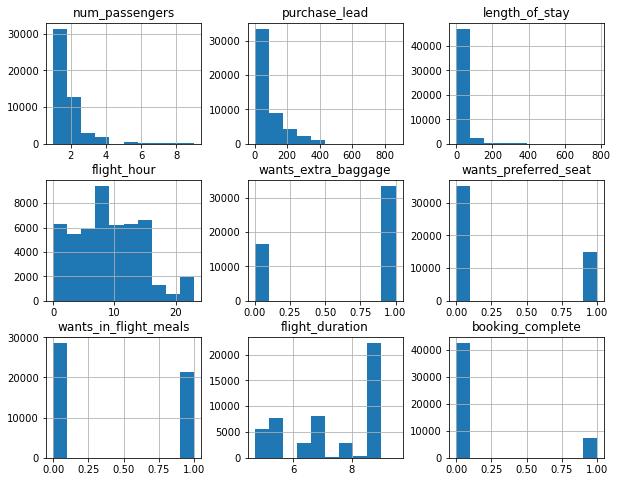

In [41]:
# Visualize the distribution of numerical variables
df.hist(figsize=(10, 8))
plt.show()


From the visualisation, the `num_passengers` column shows that the minimum number of passengers in a booking is 1, while the maximum is 9. It also shows that the majority of bookings involve a relatively small number of passengers, with occasional bookings involving larger passenger groups. The `purchase_lead` column shows that the minimum purchase lead time is 0 days, indicating bookings made on the same day as the travel date. The maximum purchase lead time is 867 days. This suggests a varied distribution of purchase lead times, with a wide range from last-minute bookings to bookings made several months in advance.
The columns `wants_extra_baggage`, `wants_preferred_seat`, `wants_in_flight_meals`, and `booking_complete` are distributed into 2 specific integer values; 0 and 1, indicating that they are of boolean datatype and not integer, therefore, they shall be converted to boolean to make them categorical columns.
The `flight_hour` column shows that most flights happen early in the morning from 7:30 to 10 am. Outside of these hours, from midnight to 3pm, we have an almost even distribution of flights. These taper off as the day winds down. 


In [42]:
bool_cols = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']
df[bool_cols].astype('bool')

,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete
0,True,False,False,False
1,False,False,False,False
2,True,True,False,False
3,False,False,True,False
4,True,False,True,False
...,...,...,...,...
49995,True,False,True,False
49996,False,False,False,False
49997,False,False,True,False
49998,True,False,True,False


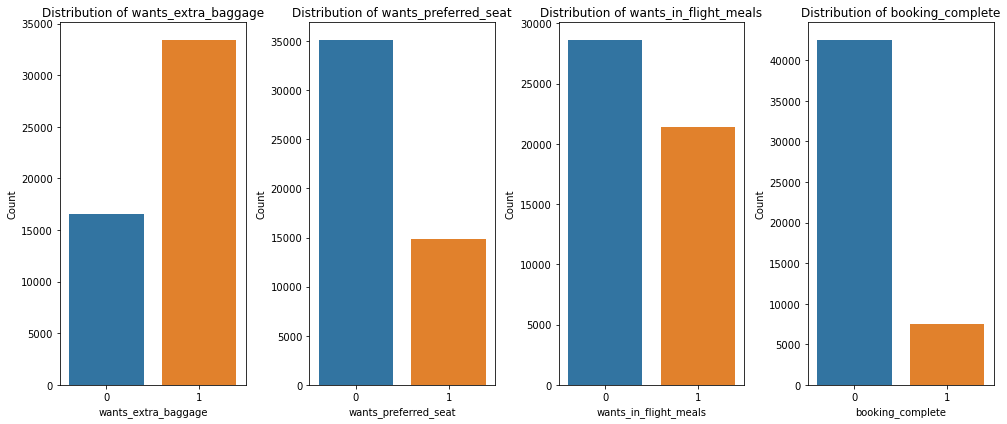

In [43]:
# Selecting only binary preference variables for distribution analysis
binary_preferences = df[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']]

# Create subplots for each binary preference variable
plt.figure(figsize=(14, 6))
for i, column in enumerate(binary_preferences.columns, 1):
    plt.subplot(1, 4, i)
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [44]:
binary_preferences = df[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']]
percentages = binary_preferences.mean() *  100
percentages

wants_extra_baggage      66.878
wants_preferred_seat     29.696
wants_in_flight_meals    42.714
booking_complete         14.956
dtype: float64

Approximately 67% of passengers prefer extra baggage, this is also clear from the visualization. 30% of the passengers had seats they preferred. 42% of the passengers preferred meals in flight. Only about 15% of the bookings were completed.
After evaluating the numerical columns, we investigte categorical columns of object dtype.

In [45]:
categorical_columns = ['booking_origin', 'trip_type', 'flight_day', 'route']
unique_counts = {col: df[col].nunique() for col in categorical_columns}
unique_counts

{'booking_origin': 104, 'trip_type': 3, 'flight_day': 7, 'route': 799}

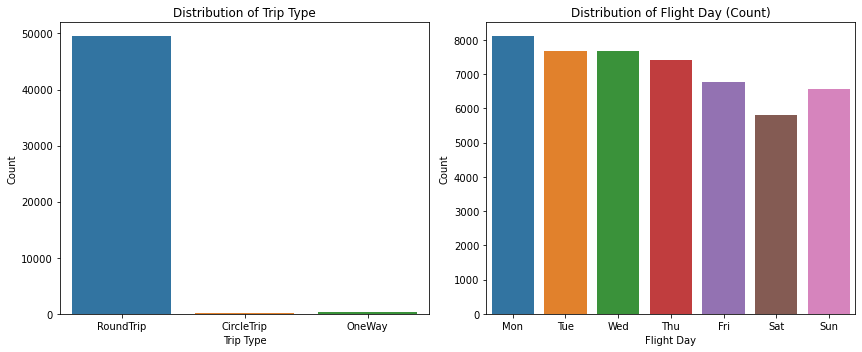

In [46]:
# Define the order of days of the week starting from Monday
ordered_days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Reorder the 'flight_day' column based on the order of days of the week
df['flight_day'] = pd.Categorical(df['flight_day'], categories=ordered_days_of_week, ordered=True)

plt.figure(figsize=(18, 5))

# Plot the distribution of 'trip_type' separately
plt.subplot(1, 3, 1)
sns.countplot(x='trip_type', data=df)
plt.title('Distribution of Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Count')

# Plot the distribution of 'flight_day' based on counts
plt.subplot(1, 3, 2)
sns.countplot(x='flight_day', data=df, order=ordered_days_of_week)
plt.title('Distribution of Flight Day (Count)')
plt.xlabel('Flight Day')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [47]:
df['flight_day'].unique()

['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri']
Categories (7, object): ['Mon' < 'Tue' < 'Wed' < 'Thu' < 'Fri' < 'Sat' < 'Sun']

From the chart, the highest number of bookings were round trips, followed by one way trips. Circle trips which are like round-trips, except that the route on the return trip differs from the route on the outgoing trip, were least booked.



In [48]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
min               0.000000              0.000000     

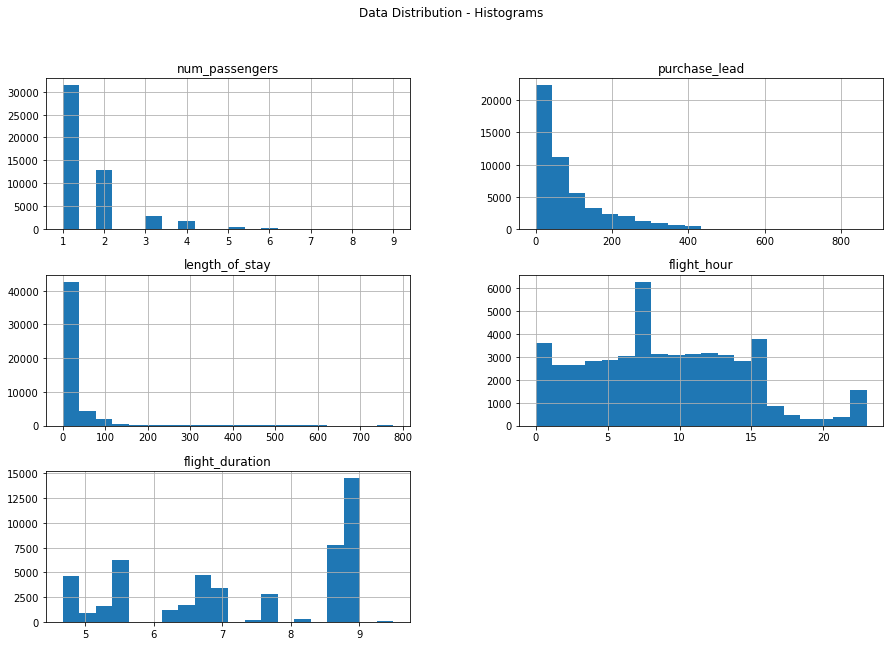

In [49]:
# Data Distribution - Histograms
numerical_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Data Distribution - Histograms")
plt.show()

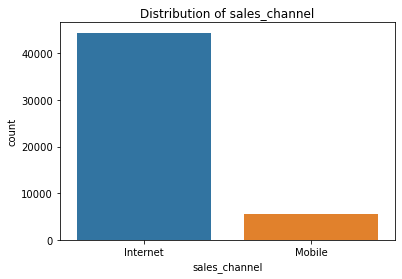

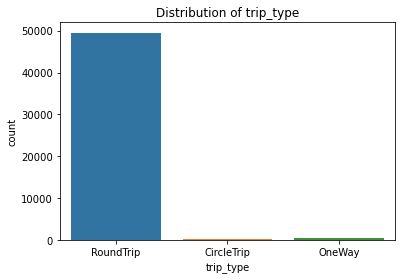

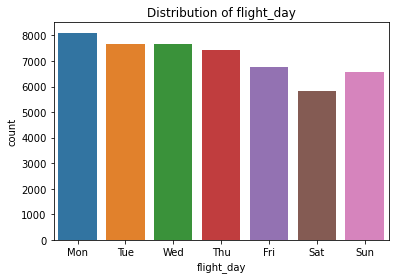

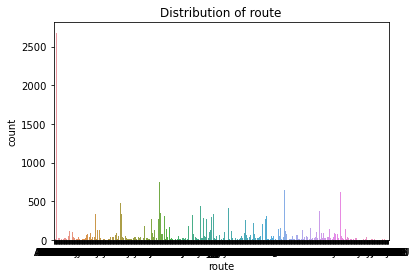

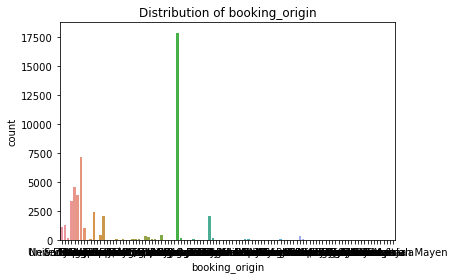

In [50]:
# Data Distribution - Categorical Variables
categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
for column in categorical_columns:
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

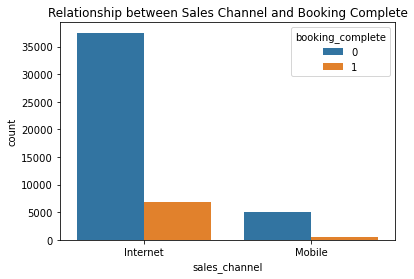

In [51]:
# Explore Relationships - Example: Sales Channel vs. Booking Complete
sns.countplot(x='sales_channel', hue='booking_complete', data=df)
plt.title("Relationship between Sales Channel and Booking Complete")
plt.show()

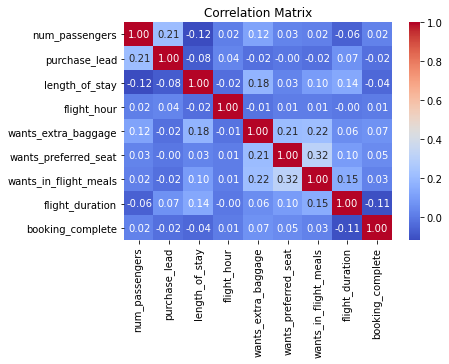

In [52]:
# Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

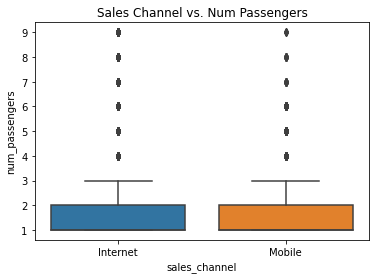

In [53]:
# Pattern Recognition - Example: Sales Channel vs. Num Passengers
sns.boxplot(x='sales_channel', y='num_passengers', data=df)
plt.title("Sales Channel vs. Num Passengers")
plt.show()

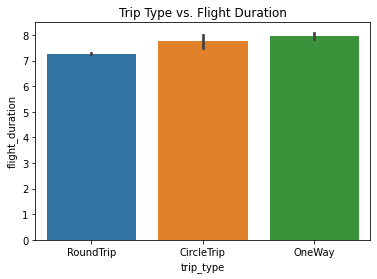

In [54]:
# Segmentation - Example: Trip Type vs. Flight Duration
sns.barplot(x='trip_type', y='flight_duration', data=df)
plt.title("Trip Type vs. Flight Duration")
plt.show()

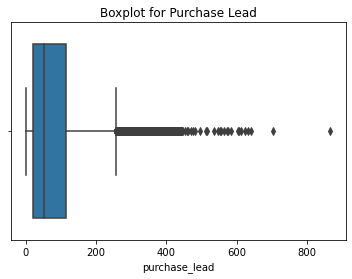

In [55]:
# Outlier Detection - Example: Boxplot for Purchase Lead
sns.boxplot(x='purchase_lead', data=df)
plt.title("Boxplot for Purchase Lead")
plt.show()

## Feature Engineering

Transforming the values in column ‘flight day’ to a numerical value 1–7.

In [66]:
#converting flight day into a numerical value btwn 1 and 7
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)
df["flight_day"].sample(5)

44474    1
2449     5
8387     1
2787     4
21906    3
Name: flight_day, dtype: int64

Transforming column ‘sales_channel’ and ‘trip_type’ to a numerical datatype using dummy variables.

In [67]:
df2 = pd.get_dummies(df, columns=['sales_channel']) # dummy variables for the sales channel column
df2 = pd.get_dummies(df2, columns=['trip_type']) # dummy variables for the trip_type column
df2.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,0,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1,0,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,0,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,0,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,0,0,0,1


In [68]:
df2=df2.drop(['route','booking_origin'], axis=1) #dropping unncessary columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_passengers          50000 non-null  int64  
 1   purchase_lead           50000 non-null  int64  
 2   length_of_stay          50000 non-null  int64  
 3   flight_hour             50000 non-null  int64  
 4   flight_day              50000 non-null  int64  
 5   wants_extra_baggage     50000 non-null  int64  
 6   wants_preferred_seat    50000 non-null  int64  
 7   wants_in_flight_meals   50000 non-null  int64  
 8   flight_duration         50000 non-null  float64
 9   booking_complete        50000 non-null  int64  
 10  sales_channel_Internet  50000 non-null  uint8  
 11  sales_channel_Mobile    50000 non-null  uint8  
 12  trip_type_CircleTrip    50000 non-null  uint8  
 13  trip_type_OneWay        50000 non-null  uint8  
 14  trip_type_RoundTrip     50000 non-null

In [73]:
df2.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,1,0,0,5.52,0,1,0,0,0,1
1,1,112,20,3,6,0,0,0,5.52,0,1,0,0,0,1
2,2,243,22,17,3,1,1,0,5.52,0,1,0,0,0,1
3,1,96,31,4,6,0,0,1,5.52,0,1,0,0,0,1
4,2,68,22,15,3,1,0,1,5.52,0,1,0,0,0,1


# Modelling

In [74]:
X = df2.drop(columns=['booking_complete'])
y = df2['booking_complete']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Resampling 

In [75]:
# Creating a resampling pipeline with SMOTE for oversampling and RandomUnderSampler for undersampling
resampling_pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy=0.5)),
    ('undersample', RandomUnderSampler(sampling_strategy=0.8)),
])
# Fit and transform the training data using the resampling pipeline
X_resampled, y_resampled = resampling_pipeline.fit_resample(X_train, y_train)


In [76]:
# Standardize features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

In [77]:
# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=100)
rand_clf.fit(X_resampled, y_resampled)
y_pred_rf = rand_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of RandomForest Classifier: {:.2f}%".format(accuracy_rf * 100))

# Support Vector Machine
svm_clf = svm.SVC(kernel='linear', C=1)
svm_clf.fit(X_resampled, y_resampled)
y_pred_svm = svm_clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of Support Vector Machine: {:.2f}%".format(accuracy_svm * 100))

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100)
gb_clf.fit(X_resampled, y_resampled)
y_pred_gb = gb_clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy of Gradient Boosting: {:.2f}%".format(accuracy_gb * 100))

Accuracy of RandomForest Classifier: 77.14%
Accuracy of Support Vector Machine: 67.11%
Accuracy of Gradient Boosting: 77.95%
